In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage import io, color, img_as_float
from skimage.restoration import wiener
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

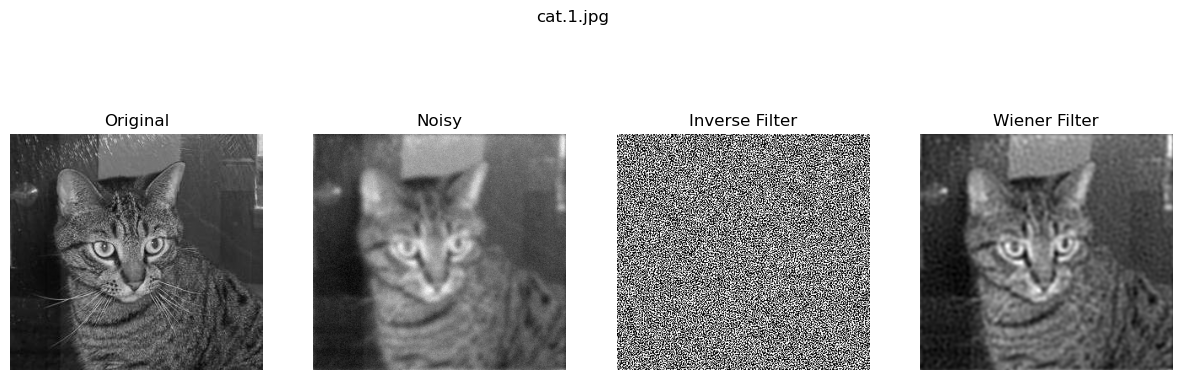

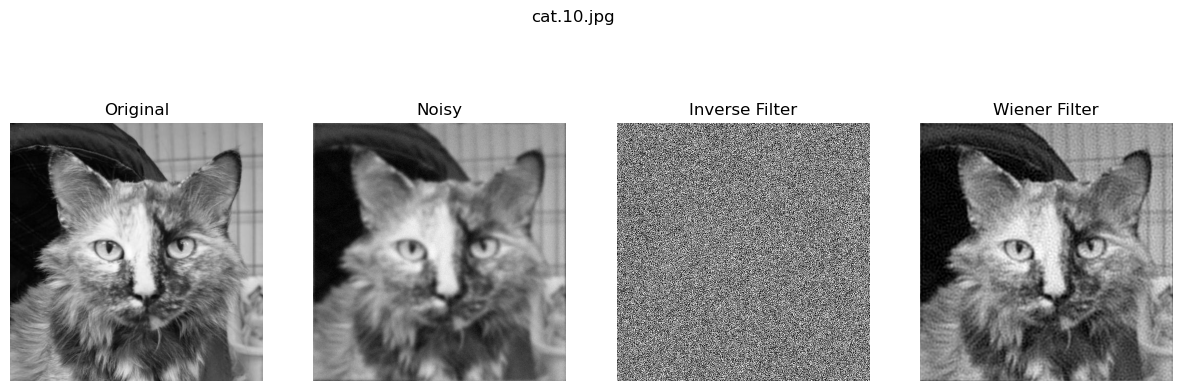

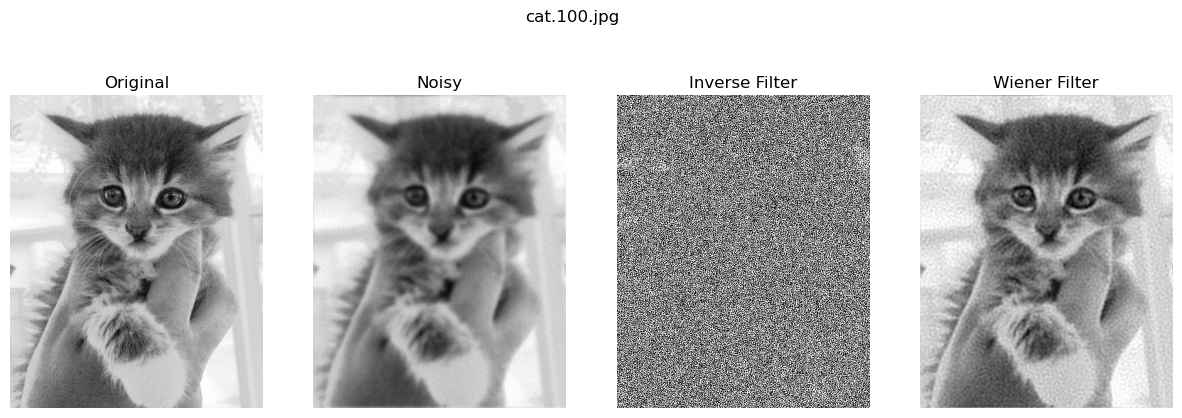

In [ ]:
folder = r"C:\Users\adibh\Downloads\archive (4)\Data\cats"
for idx, file in enumerate(os.listdir(folder)):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
        if idx >= 5:
            break
        path = os.path.join(folder, file)
        img = img_as_float(io.imread(path))
        if img.ndim == 3:
            img = color.rgb2gray(img)
        m, n = img.shape
        sigma = 2.5
        y, x = np.indices((m, n))
        cy, cx = m // 2, n // 2
        psf = np.exp(-((x - cx)**2 + (y - cy)**2) / (2.0 * sigma**2))
        psf /= psf.sum()
        IMG = fftpack.fft2(img)
        PSF = fftpack.fft2(fftpack.ifftshift(psf))
        blurred = np.real(fftpack.ifft2(IMG * PSF))
        noise_sigma = 0.02
        noisy = blurred + np.random.normal(scale=noise_sigma, size=blurred.shape)
        noisy = np.clip(noisy, 0, 1)
        eps = 1e-3
        IMGn = fftpack.fft2(noisy)
        rec_inv = np.real(fftpack.ifft2(IMGn / (PSF + eps)))
        rec_inv = np.clip(rec_inv, 0, 1)
        noise_var = noise_sigma**2
        signal_var = np.var(img)
        K = noise_var / (signal_var + 1e-12)
        H_conj = np.conj(PSF)
        H_abs2 = np.abs(PSF)**2
        wiener_freq = (H_conj / (H_abs2 + K)) * IMGn
        rec_wiener = np.real(fftpack.ifft2(wiener_freq))
        rec_wiener = np.clip(rec_wiener, 0, 1)
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        axes[0].imshow(img, cmap='gray'); axes[0].set_title("Original"); axes[0].axis("off")
        axes[1].imshow(noisy, cmap='gray'); axes[1].set_title("Noisy"); axes[1].axis("off")
        axes[2].imshow(rec_inv, cmap='gray'); axes[2].set_title("Inverse Filter"); axes[2].axis("off")
        axes[3].imshow(rec_wiener, cmap='gray'); axes[3].set_title("Wiener Filter"); axes[3].axis("off")
        plt.suptitle(file)
        plt.show()